In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

from sklearn.datasets import make_blobs, fetch_olivetti_faces
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.25)

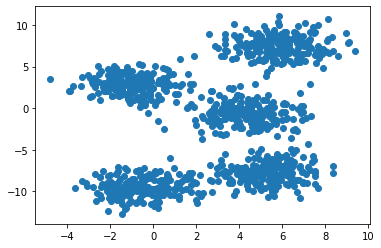

In [ ]:
plt.scatter(x[:, 0], x[:, 1])

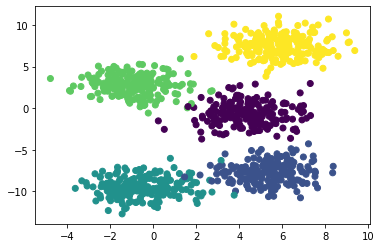

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y)

# Clustering

## K-Means

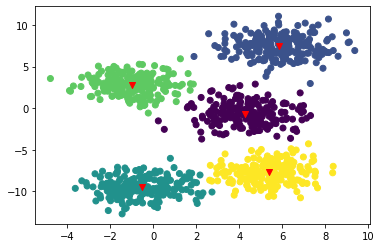

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(x)

# Get the centroids of the clusters and plot them
centroids = kmeans.cluster_centers_

plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.scatter(centroids[:, 0], centroids[:,1], marker='v', c='red')
plt.show()

In [ ]:
x_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

kmeans.transform(x_new)

array([[ 5.05532929,  8.00581529, 11.52183352,  1.25991573, 11.09098905],
       [ 2.97230608,  6.15434988, 12.03418612,  4.06280013,  9.99252018],
       [ 8.16312381,  9.92074858, 12.75557166,  2.02508946, 13.58636512],
       [ 7.95030488, 10.15458977, 12.26556701,  2.03339836, 13.19581248]])

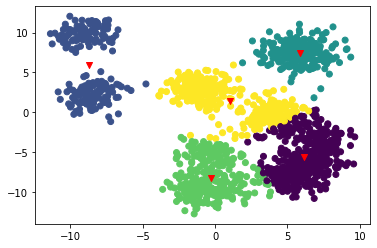

In [ ]:
x2, y2 = make_blobs(n_samples=500, centers=5, n_features=2, cluster_std=1.12)

x_sum = np.concatenate((x, x2))
y_sum = np.concatenate((y, y2))

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(x_sum)

# Get the centroids of the clusters and plot them
centroids = kmeans.cluster_centers_

plt.scatter(x_sum[:, 0], x_sum[:, 1], c=y_pred)
plt.scatter(centroids[:, 0], centroids[:,1], marker='v', c='red')
plt.show()

In [ ]:
kmeans.inertia_

13372.708868218464

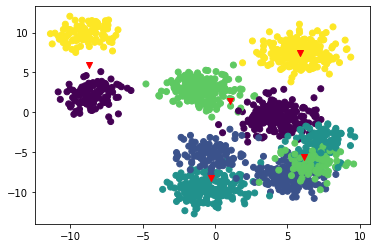

In [ ]:
plt.scatter(x_sum[:, 0], x_sum[:, 1], c=y_sum)
plt.scatter(centroids[:, 0], centroids[:,1], marker='v', c='red')
plt.show()

In [ ]:
kmeans.inertia_

13372.708868218464

## Finding the optimal number of clusters

In [ ]:
silhouette_score(x_sum, kmeans.labels_)

0.5186765392341876

## Using Clustering for Image Sementation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


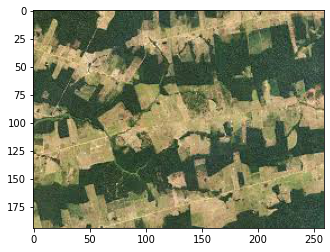

In [ ]:
image = imread(os.path.join('drive', 'MyDrive', 'ml-telus', 'hands_on_machine_learning', 'images', 'forest.jpg'))
plt.imshow(image)

In [ ]:
x = image.reshape(-1, 3)

kmeans = KMeans(n_clusters=2).fit(x)
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape).round(0).astype(int)

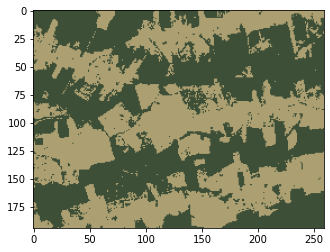

In [ ]:
plt.imshow(segmented_image)

## Using Clustering for Preprocessing

In [ ]:
x_digits, y_digits = load_digits(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

log_reg.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9488888888888889

In [ ]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)),
    ('log_reg', LogisticRegression())
])

pipeline.fit(x_train, y_train)
pipeline.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9555555555555556

In [ ]:
# Let's improve the score by looking for the number of clusters for K-Means using GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=5, verbose=0)
grid_clf.fit(x_train, y_train)

grid_clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'kmeans__n_clusters': 50}

In [ ]:
grid_clf.score(x_test, y_test)

0.9644444444444444

## DBSCAN

In [ ]:
x, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=0.05)

In [ ]:
# Let's implement a knn with the core instances of the DBSCAN to predict new instances

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
# Let's predict using the previous

x_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(x_new)

array([4, 2, 3, 0])

In [ ]:
knn.predict_proba(x_new)

array([[0.  , 0.  , 0.22, 0.  , 0.78, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.86, 0.  , 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.22, 0.  , 0.78, 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

# Gaussian Mixtures

In [ ]:
# Create the dataset for Gaussian Mixtures
x1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
x1 = x1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
x2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
x2 = x2 + [6, -8]
x = np.r_[x1, x2]
y = np.r_[y1, y2]

In [ ]:
gm = GaussianMixture(n_components=3, n_init=100)

gm.fit(x)

GaussianMixture(n_components=3, n_init=100)

In [ ]:
print(f'The weights of GaussianMixture model are:\n\t {gm.weights_}\n')
print(f'The means of GaussianMixture model are:\n\t {gm.means_}\n')
print(f'The covariances of GaussianMixture model are:\n\t {gm.covariances_}\n')

The weights of GaussianMixture model are:
	 [0.39065109 0.20925194 0.40009697]

The means of GaussianMixture model are:
	 [[ 0.05292802  0.07720061]
 [ 3.40241777  1.05702687]
 [-1.40745226  1.42727761]]

The covariances of GaussianMixture model are:
	 [[[ 0.69052478  0.79895376]
  [ 0.79895376  1.21568342]]

 [[ 1.14357415 -0.02922398]
  [-0.02922398  0.95297095]]

 [[ 0.63518782  0.7300408 ]
  [ 0.7300408   1.16123726]]]



In [ ]:
print(f'Did the GaussianMixture model converged? {gm.converged_}')
print(f'Iterations taken to converge: {gm.n_iter_}')

Did the GaussianMixture model converged? True
Iterations taken to converge: 6


In [ ]:
gm.predict(x)

array([0, 0, 2, ..., 1, 1, 1])

In [ ]:
gm.predict_proba(x)

array([[9.77270907e-01, 2.27284124e-02, 6.80542526e-07],
       [9.83281876e-01, 1.60398423e-02, 6.78281758e-04],
       [7.51931764e-05, 1.93447944e-06, 9.99922872e-01],
       ...,
       [4.39240952e-07, 9.99999561e-01, 2.19704604e-26],
       [5.39200212e-16, 1.00000000e+00, 1.52817376e-41],
       [2.33864674e-15, 1.00000000e+00, 8.29296554e-41]])

In [ ]:
x_new, y_new = gm.sample(6)
x_new

array([[ 0.92245318,  0.49822413],
       [ 1.00242242,  1.98416   ],
       [-1.58841166, -2.26479606],
       [-0.40257455,  0.38211372],
       [-1.47097305,  2.00670376],
       [-2.07961319, -0.23808265]])

In [ ]:
y_new

array([0, 0, 0, 0, 2, 2])

In [ ]:
gm.score_samples(x)

array([-2.60562363, -3.57128156, -3.33045538, ..., -3.51403945,
       -4.39552047, -3.80518816])

## Anomaly Detection Using Gaussian Mixtures

In [ ]:
densities = gm.score_samples(x)
density_thresholds = np.percentile(densities, 4)
anomalies = x[densities < density_thresholds]

## Selecting the Numbers of Clusters

- Bayesian information criterion (BIC)
> $BIC = \text{log}(m)p-2\text{log}(\hat{L})$

- Akaike information criterion (AIC)
> $AIC = 2p-2\text{log}(\hat{L})$

Where:    
> - $m$ is the number of instances
> - $p$ is the number of parameters learned by the model
> - $\hat{L}$ is the maximized value of the likelihood function of the model



In [ ]:
# Calculate the BIC and AIC of the model

bic = gm.bic(x)
aic = gm.aic(x)

print(f'The AIC of the model is {round(aic, 2)} and the BIC of the model is {round(bic, 2)}')

The AIC of the model is 8102.41 and the BIC of the model is 8189.63


In [ ]:
k = 9

bic_list = []
aic_list = []
clusters = [cluster + 1 for cluster in range(k)]

for i in clusters:
  gm = GaussianMixture(n_components=i, n_init=100)
  gm.fit(x)

  bic = gm.bic(x)
  aic = gm.aic(x)

  bic_list.append(bic)
  aic_list.append(aic)

  print(f'Results for the model with {i} clusters:')
  print(f'\tThe AIC of the model is {round(aic, 2)} and the BIC of the model is {round(bic, 2)} \n')

bic_list = np.array(bic_list)
aic_list = np.array(aic_list)
clusters = np.array(clusters)

In [ ]:
min(bic_list)

8189.718049665738

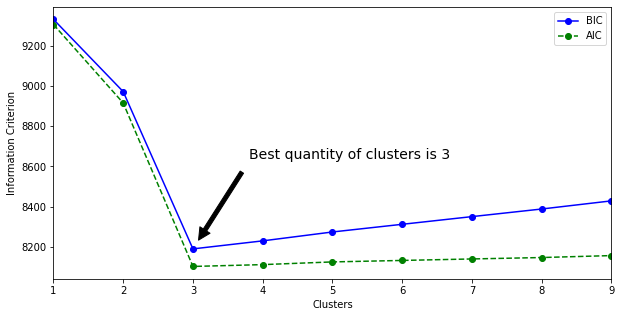

In [ ]:
optimal_clusters = clusters[np.argmin(bic_list)]

plt.figure(figsize=(10, 5))
plt.plot(clusters, bic_list, 'bo-', marker='o', label='BIC', )
plt.plot(clusters, aic_list, 'go--', marker='o', label='AIC')
plt.legend()
plt.xlabel('Clusters')
plt.ylabel('Information Criterion')

plt.annotate(f'Best quantity of clusters is {optimal_clusters}',
             xy=[optimal_clusters, min(bic_list)],
             xytext=(0.4, 0.5),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlim(1, 9)
plt.show()

## Bayesian Gaussian Mixture Models

In [ ]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(x)
np.round(bgm.weights_, 2)

# Exercises

## Questions 1-9

1. How would you define clustering? Can you name a few clustering algorithms?

> Clustering is the task of assigning the instances to classes or clusters based on their feature similarity, this can be their distance or their location in high density clusters. 

2. What are some of the main applications of clustering algorithms?

> Clustering can be used to group the customers to suggest content that other customers in the same cluster may seem to like, to detect anomalies in a line production, to segment an image based on the color of its pixels, to search engines where the input is compared to the existing clusters to show the instances in the same cluster, etc.

3. Describe two techniques to select the right number of clusters when using
K-Means.

> The first technique is evaluating the silhouette score. This evaluates if the instances are assigned to the correct cluster, if they are in the limit of clusters or on the wrong cluster by evaluating the distance to the assigned cluster and the mean distance to the other clusters.
> The second technique is by plotting the inertia of the different models and look for the elbow in the plot to find the optimal k value.

4. What is label propagation? Why would you implement it, and how?

> The label propagation is the generalization of the label from the labeled instances to the unlabeled instances in the same cluster. This helps to avoid labeling manually and allows to have several labeled instances in the training data. This can be implemented when we only have a few labeled instances and a lot of unlabeled instance. By using clustering algorithms, we can group the unlabeled and labeled and then propagate the labels to all the unlabeled instances.

5. Can you name two clustering algorithms that can scale to large datasets? And
two that look for regions of high density?

> K-Means and BIRCH scale well to large datasets. DBSCAN and Mean-Shift look
for regions of high density

6. Can you think of a use case where active learning would be useful? How would
you implement it?

> Active learning can be useful when we are trying to automatize a clustering process that have inputs that will change in time. Whenever the model is uncertain on how to group an instance, a human expert can label the instance. This helps to automatize and provide good quality data to the model.

7. What is the difference between anomaly detection and novelty detection?

> Anomaly detection has as target to determine those instances that are outliers or do not fit in the clusters (low density regions, low afinity instances, etc). Novelty detection asumes the model to be trained in clean data that do not contain any outlier.

8. What is a Gaussian mixture? What tasks can you use it for?

> A Gaussian Mixture assumes that the training data has been generated by a sum of gaussian distribution. The algorithm calculates the mean $\mu$ and the covariances $\Sigma$ for the distributions based on the instances $\textbf{x}$. Gaussian mixture is great for density estimation, for anomaly detection and for clustering

9. Can you name two techniques to find the right number of clusters when using a
Gaussian mixture model?

> The first technique is the use of the BIC and AIC criterion. This criterions penalize the models with more parameters (e.g., more clusters) and rewards the models where the data fit better. The second technique is Bayesian Gaussian Mixture. This calculate the weights of the clusters based on how useful they are.


## Question 10

10. The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?


In [ ]:
faces = fetch_olivetti_faces()

In [ ]:
# First is splitted the dataset into training/validation set and test set

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40)
train_valid_idx, test_idx = next(strat_split.split(faces.data, faces.target))

x_train_valid = faces.data[train_valid_idx]
y_train_valid = faces.target[train_valid_idx]

x_test = faces.data[test_idx]
y_test = faces.target[test_idx]

# Then the data is splitted into training and validation sets
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80)
train_idx, validation_idx = next(strat_split.split(x_train_valid, y_train_valid))

x_train = x_train_valid[train_idx]
y_train = y_train_valid[train_idx]

x_valid = x_train_valid[validation_idx]
y_valid = y_train_valid[validation_idx]

In [ ]:
print('The dimensions are the following:')
print(f'\tTraining x: {x_train.shape}\n\tTraining y: {y_train.shape}')
print(f'\n\tValidation x: {x_valid.shape}\n\tValidation y: {y_valid.shape}')
print(f'\n\tTesting x: {x_test.shape}\n\tTesting y: {y_test.shape}')

The dimensions are the following:
	Training x: (280, 4096)
	Training y: (280,)

	Validation x: (80, 4096)
	Validation y: (80,)

	Testing x: (40, 4096)
	Testing y: (40,)


In [ ]:
pca = PCA(0.99)

x_train_pca = pca.fit_transform(x_train)
x_valid_pca = pca.transform(x_valid)
x_test_pca = pca.transform(x_test)

pca.n_components_

200

In [ ]:
k_range = range(5, 200, 5)
kmeans_per_k = []

for k in k_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(x_train_pca)
  print(f'Clusters = {k}')
  kmeans_per_k.append(kmeans)

Clusters = 5
Clusters = 10
Clusters = 15
Clusters = 20
Clusters = 25
Clusters = 30
Clusters = 35
Clusters = 40
Clusters = 45
Clusters = 50
Clusters = 55
Clusters = 60
Clusters = 65
Clusters = 70
Clusters = 75
Clusters = 80
Clusters = 85
Clusters = 90
Clusters = 95
Clusters = 100
Clusters = 105
Clusters = 110
Clusters = 115
Clusters = 120
Clusters = 125
Clusters = 130
Clusters = 135
Clusters = 140
Clusters = 145
Clusters = 150
Clusters = 155
Clusters = 160
Clusters = 165
Clusters = 170
Clusters = 175
Clusters = 180
Clusters = 185
Clusters = 190
Clusters = 195


In [ ]:
def evaluation_kmeans(min_k, max_k, interval_k, x_train):
  """This function evaluates different KMeans models using a range of clusters
  going from min_k to max_k intervals of interval_k.

  This function also plots the inertia of the clusters and a plot of the silhouette score
  of the different models
  """

  k_range = range(min_k, max_k, interval_k)
  kmeans_per_k = []

  for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_train)
    kmeans_per_k.append(kmeans)

  # Silhouette Score evaluation and inertia

  sil_scores = [silhouette_score(x_train_pca, kmeans.labels_) for kmeans in kmeans_per_k]
  best_sil_index = np.argmax(sil_scores)
  best_score = sil_scores[best_sil_index]
  best_k = k_range[best_sil_index]

  inertia_scores = [kmeans.inertia_ for kmeans in kmeans_per_k]
  best_inertia = inertia_scores[best_sil_index]

  # Plot the results

  plt.figure(figsize=(10, 5))
  plt.plot(k_range, sil_scores, 'bo-')
  plt.plot(best_k, best_score, 'ro')

  plt.annotate(f'Best quantity of clusters is {best_k}',
              xy=[best_k, best_score],
              xytext=(0.4, 0.5),
              textcoords='figure fraction',
              fontsize=14,
              arrowprops=dict(facecolor='black', shrink=0.1))

  plt.xlabel('k Clusters', fontsize=12)
  plt.ylabel('Silhouette Scores', fontsize=12)
  plt.title('K Clusters vs Silhouette Score')
  plt.show()
  
  inertia_scores = [kmeans.inertia_ for kmeans in kmeans_per_k]
  best_inertia = inertia_scores[best_sil_index]
  best_k = k_range[best_sil_index]

  plt.figure(figsize=(10, 5))
  plt.plot(k_range, inertia_scores, 'bo-')
  plt.plot(best_k, best_inertia, 'ro')

  plt.annotate(f'Best quantity of clusters is {best_k}',
              xy=[best_k, best_inertia],
              xytext=(0.4, 0.5),
              textcoords='figure fraction',
              fontsize=14,
              arrowprops=dict(facecolor='black', shrink=0.1))

  plt.xlabel('k Clusters', fontsize=12)
  plt.ylabel('Inertia', fontsize=12)
  plt.title('K Clusters vs Inertia')
  plt.show()

  return kmeans_per_k[best_sil_index]

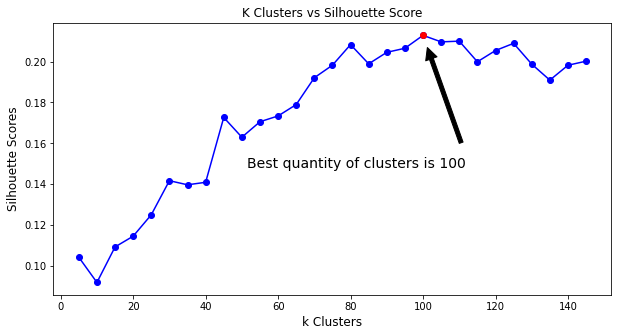

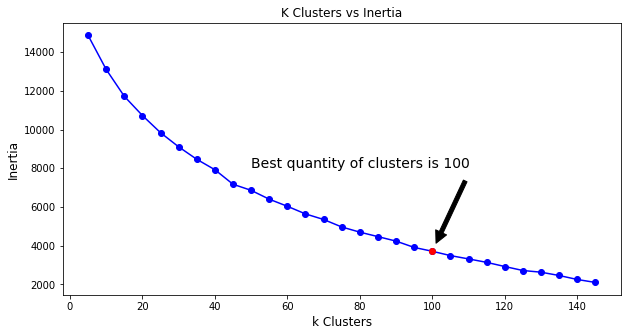

In [ ]:
best_model = evaluation_kmeans(5, 150, 5, x_train_pca)

## Question 11

11. Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=200)

rnd_clf.fit(x_train_pca, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rnd_clf.score(x_valid_pca, y_valid)

0.9125

Now let's train the classification model on the data recuded per kmeans

In [ ]:
x_train_reduced = best_model.transform(x_train_pca)
x_valid_reduced = best_model.transform(x_valid_pca)
x_test_reduced = best_model.transform(x_test_pca)

rnd_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rnd_clf.fit(x_train_reduced, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [ ]:
rnd_clf.score(x_valid_reduced, y_valid)

0.8125

In [ ]:
k_clusters = 200

scores = []

for k in range(5, k_clusters, 5):
  pipeline = Pipeline([
      ('kmeans', KMeans(n_clusters=k)),
      ('rnd_clf', RandomForestClassifier(n_estimators=200, n_jobs=-1))
  ])

  pipeline.fit(x_train_reduced, y_train)
  score_pipeline = pipeline.score(x_valid_reduced, y_valid)
  scores.append([k, score_pipeline])

scores = np.array(scores)

In [ ]:
best_result = scores[np.argmax(scores[:,1])]

Text(0.6, 0.5, 'Best quantity of clusters is 75')

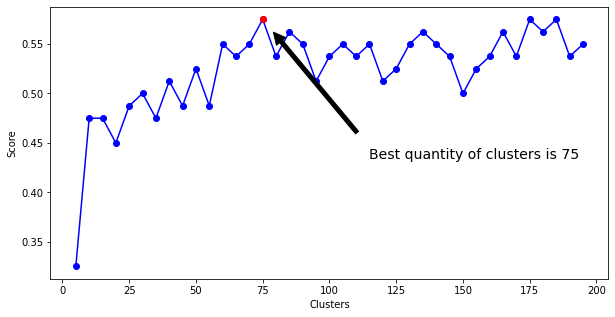

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(scores[:, 0], scores[:, 1], 'bo-')
plt.plot(best_result[0], best_result[1], 'ro')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.annotate(f'Best quantity of clusters is {int(best_result[0])}',
              xy=[best_result[0], best_result[1]],
              xytext=(0.6, 0.5),
              textcoords='figure fraction',
              fontsize=14,
              arrowprops=dict(facecolor='black', shrink=0.1))

In [ ]:
print(f'The best result is obtained for {best_result[0]} clusters with a score of {best_result[1]}')

The best result is obtained for 75.0 clusters with a score of 0.575


In [ ]:
x_train_extended = np.c_[x_train_pca, x_train_reduced]
x_valid_extended = np.c_[x_valid_pca, x_valid_reduced]
x_test_extended = np.c_[x_test_pca, x_test_reduced]

k_clusters = 200

scores = []

for k in range(5, k_clusters, 5):
  pipeline = Pipeline([
      ('kmeans', KMeans(n_clusters=k)),
      ('rnd_clf', RandomForestClassifier(n_estimators=200, n_jobs=-1))
  ])

  pipeline.fit(x_train_extended, y_train)
  score_pipeline = pipeline.score(x_valid_extended, y_valid)
  scores.append([k, score_pipeline])

scores = np.array(scores)

In [ ]:
best_result = scores[np.argmax(scores[:,1])]

Text(0.6, 0.5, 'Best quantity of clusters is 175')

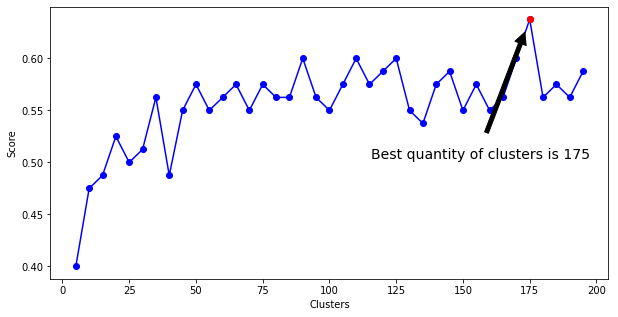

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(scores[:, 0], scores[:, 1], 'bo-')
plt.plot(best_result[0], best_result[1], 'ro')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.annotate(f'Best quantity of clusters is {int(best_result[0])}',
              xy=[best_result[0], best_result[1]],
              xytext=(0.6, 0.5),
              textcoords='figure fraction',
              fontsize=14,
              arrowprops=dict(facecolor='black', shrink=0.1))

In [ ]:
print(f'The best result is obtained for {best_result[0]} clusters with a score of {best_result[1]}')

The best result is obtained for 175.0 clusters with a score of 0.6375


## Question 12

12. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anoma
lies).

In [ ]:
pca = PCA(n_components=0.99)

x_train_pca = pca.fit_transform(x_train)
x_valid_pca = pca.transform(x_valid)
x_test_pca = pca.transform(x_test)

In [ ]:
gm = GaussianMixture(n_components=10)
gm.fit(x_train_pca)

GaussianMixture(n_components=10)

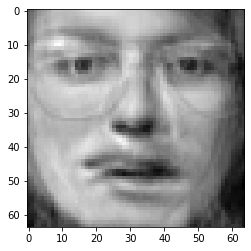

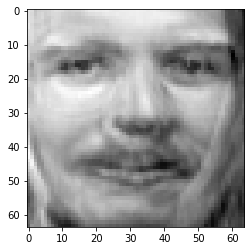

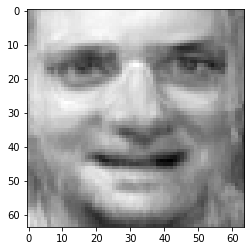

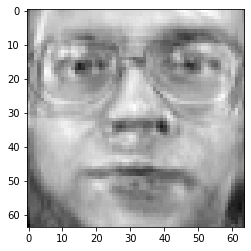

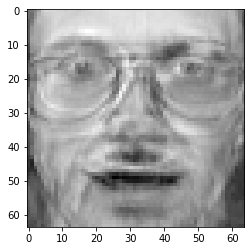

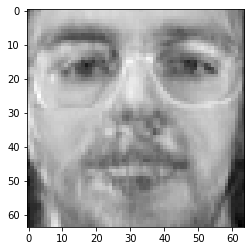

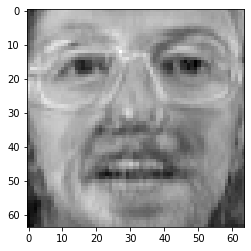

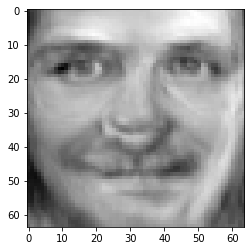

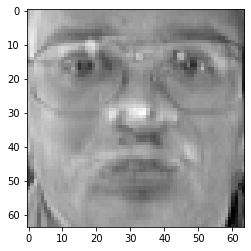

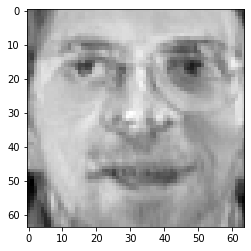

In [67]:
for _ in range(10):
  new_faces_gm = gm.sample(1)
  new_face = pca.inverse_transform(new_faces_gm[0]).reshape(-1).reshape(64, 64)
  plt.imshow(new_face, cmap='gray')
  plt.show()

In [ ]:
scores = gm.score(x_valid_pca)
print(scores)

-4147397.1518596066


## Question 13

13. Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstructa normal face.

In [81]:
def plot_faces(x, n_cols=4):

  n_rows = len(x) // n_cols
  
  for index, face in enumerate(x):
    face = face.reshape(-1).reshape(64,64)

    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(face, cmap='gray')
  
  plt.show()

In [86]:
def reconstructed_error(pca, x):

  x_reduced = pca.fit_transform(x)
  x_reconstructed = pca.inverse_transform(x_reduced)

  plot_faces(x)
  plot_faces(x_reconstructed)

  mse = np.square(x_reconstructed - x).mean(axis=-1)

  print(f'The error in the reconstruction is {mse}')

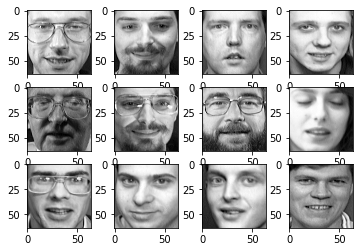

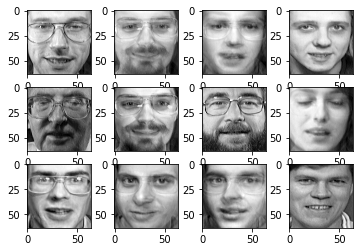

The error in the reconstruction is [4.8533815e-04 4.3315212e-03 4.9866145e-03 3.6585567e-04 1.8470389e-04
 2.4406349e-03 9.5769406e-05 7.9326169e-04 1.3114514e-03 2.0164330e-03
 2.5939646e-03 7.6740951e-05]


In [92]:
reconstructed_error(PCA(n_components=0.90), x_train[:12])